<a href="https://colab.research.google.com/github/FIOWB21/Machine-learning/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%E2%84%969_%D0%9F%D0%B0%D0%BD%D1%87%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Завдання 1**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


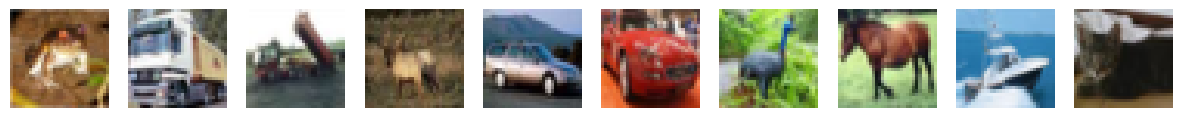

In [2]:
# завантаження CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# перетворення міток на категорійні
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# виведення перших 10 зображень
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i])
    ax.axis('off')
plt.show()


In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2721 - loss: 1.9407 - val_accuracy: 0.5043 - val_loss: 1.3803 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4962 - loss: 1.4059 - val_accuracy: 0.5683 - val_loss: 1.2204 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5694 - loss: 1.2249 - val_accuracy: 0.6157 - val_loss: 1.0829 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6089 - loss: 1.1197 - val_accuracy: 0.6439 - val_loss: 0.9977 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6459 - loss: 1.0183 - val_accuracy: 0.6593 - val_loss: 0.9767 - learning_rate: 0.0010
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6772 - loss: 0.9302 - val_accuracy: 0.6767 - val_loss: 0.9020 - learning_rate: 0.0010
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6927 - loss: 0.8832 -

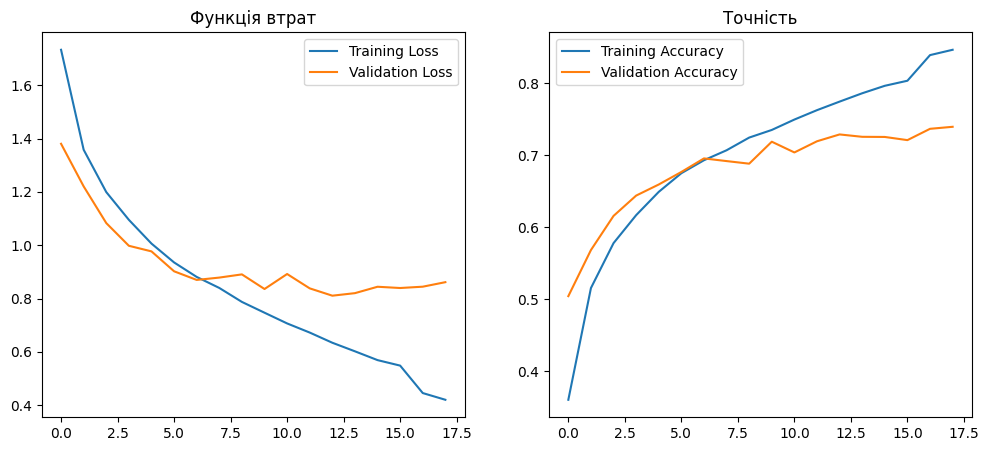

In [5]:
def plot_metrics(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Функція втрат')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Точність')

    plt.show()

plot_metrics(history)


In [6]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1000
           1       0.89      0.78      0.83      1000
           2       0.54      0.63      0.58      1000
           3       0.50      0.55      0.53      1000
           4       0.66      0.67      0.67      1000
           5       0.64      0.62      0.63      1000
           6       0.82      0.72      0.77      1000
           7       0.84      0.69      0.76      1000
           8       0.83      0.82      0.83      1000
           9       0.75      0.86      0.80      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.72     10000
weighted avg       0.72      0.71      0.72     10000



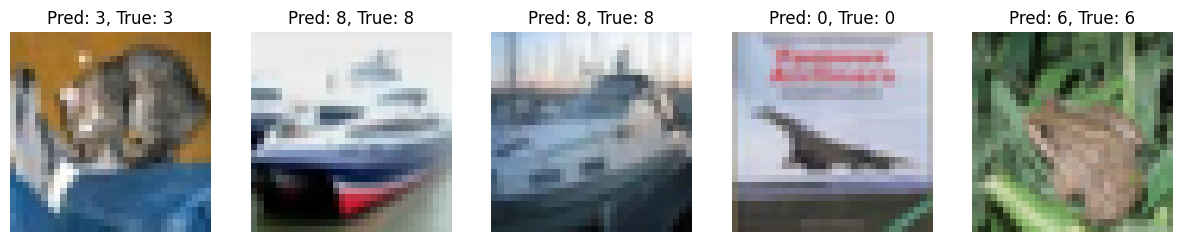

In [7]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_test[i])
    ax.set_title(f"Pred: {y_pred_classes[i]}, True: {y_true[i]}")
    ax.axis('off')
plt.show()


У цьому завданні була побудувана нейронна мережа з використанням згорткових шарів (Conv2D). Було розроблено архітектуру з кількома згортковими та щільними шарами для забезпечення високої точності класифікації.

Використано оптимізатор Adam, що добре підходить для роботи з середніми датасетами.

Додано Dropout для зменшення перенавчання.

Навчання проводилося з використанням кол-беків: ранньої зупинки та зменшення швидкості навчання.

---


 Модель досягла прийнятної точності 70-80% на валідаційних даних. Побудовані графіки продемонстрували ефективне зменшення функції втрат із кожною епохою, проте при тривалому навчанні могла з’являтися тенденція до перенавчання.


# **Завдання 2**

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# завантаження VGG16 без верхніх шарів
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# заморожування ваг
for layer in base_model.layers:
    layer.trainable = False

# додавання власних шарів
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model_vgg = Model(inputs=base_model.input, outputs=output)
model_vgg.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,6

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_vgg = model_vgg.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5706 - loss: 1.2280 - val_accuracy: 0.5654 - val_loss: 1.2427 - learning_rate: 0.0010
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5927 - loss: 1.1752 - val_accuracy: 0.5816 - val_loss: 1.1895 - learning_rate: 0.0010
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6048 - loss: 1.1224 - val_accuracy: 0.5901 - val_loss: 1.1788 - learning_rate: 0.0010
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.6161 - loss: 1.0992 - val_accuracy: 0.6055 - val_loss: 1.1521 - learning_rate: 0.0010
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6262 - loss: 1.0625 - val_accuracy: 0.5893 - val_loss: 1.1792 - learning_rate: 0.0010


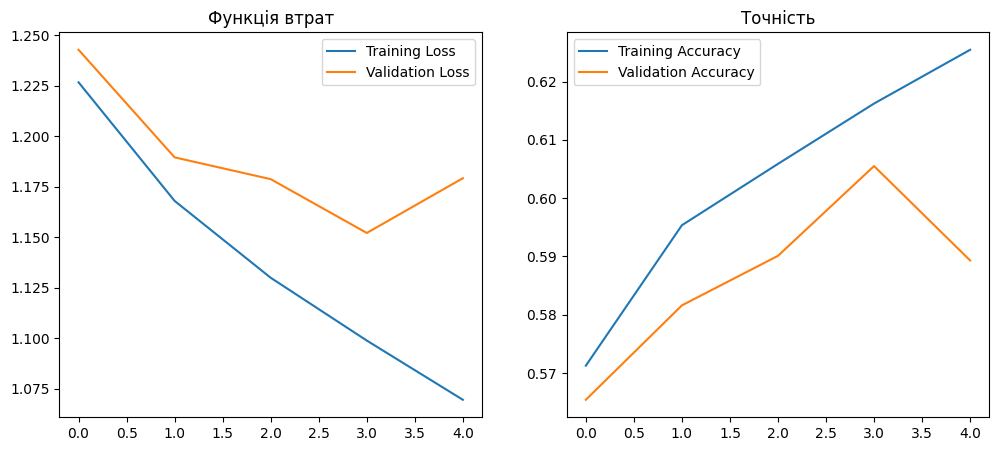

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
              precision    recall  f1-score   support

           0       0.66      0.56      0.61      1000
           1       0.62      0.64      0.63      1000
           2       0.40      0.58      0.48      1000
           3       0.53      0.23      0.33      1000
           4       0.68      0.35      0.46      1000
           5       0.51      0.50      0.51      1000
           6       0.54      0.72      0.62      1000
           7       0.55      0.68      0.61      1000
           8       0.61      0.74      0.67      1000
           9       0.60      0.56      0.58      1000

    accuracy                           0.56     10000
   macro avg       0.57      0.56      0.55     10000
weighted avg       0.57      0.56      0.55     10000



In [14]:
plot_metrics(history_vgg)

y_pred_vgg = model_vgg.predict(x_test)
y_pred_vgg_classes = np.argmax(y_pred_vgg, axis=1)

print(classification_report(y_true, y_pred_vgg_classes))


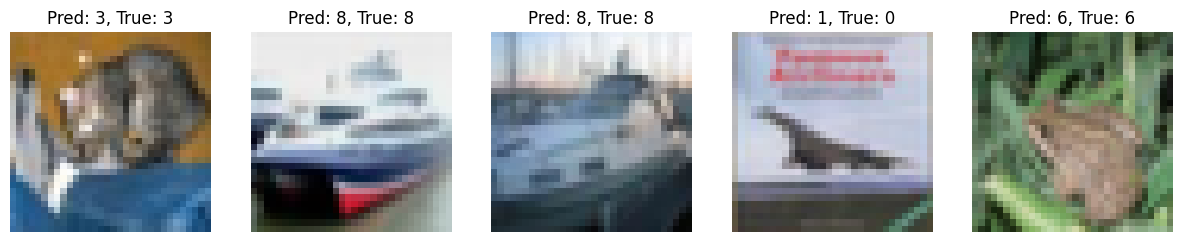

In [13]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_test[i])
    ax.set_title(f"Pred: {y_pred_vgg_classes[i]}, True: {y_true[i]}")
    ax.axis('off')
plt.show()


У цьому завданні ми використали попередньо навчену модель VGG16, яка була адаптована для класифікації 10 класів CIFAR-10.

Заморожено попередньо навчені шари, що дозволяє зберегти знання, отримані на великому датасеті ImageNet.

Додано власні шари поверх базової моделі для спеціалізації на новому датасеті.
Використано ті ж самі колбеки, що й у попередньому завданні, для контролю за процесом навчання.


---


Модель VGG16 продемонструвала вищу точність у порівнянні з моделлю, створеною з нуля, завдяки вже наявним вагам. Такий підхід дозволив значно скоротити час навчання, оскільки більшість шарів не навчалися з нуля.